# Regression exercise

### In this project, we will first make an exploratory data analysis a dataset containing information about hospitalications, then we will build a regression model to predict the amount of monmey that a patient will be charged.

## 1. Exploratory Data Analysis

In this section, we will load the data and make an exploratory data analysis to understand the data and the relationships between the variables.

### 1.1 Load the data and dependencies

In [20]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('Hospitalization.csv', sep=';') # The separator of the dataset is ';'
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,6702,12,a,9,Y,3,S,B,30.0,61823,80.0,Trauma,Moderate,4,51-60,75580,21-30
1,459,14,c,1,Z,3,Q,F,10.0,6760,50.0,Emergency,Moderate,4,71-80,46920,51-60
2,832,14,a,1,X,5,Q,E,10.0,124420,80.0,Emergency,Moderate,3,31-40,64310,21-30
3,2614,31,f,1,X,2,S,E,30.0,53262,80.0,Trauma,Moderate,4,31-40,60550,71-80
4,3765,26,a,7,Y,4,Q,C,30.0,117722,50.0,Trauma,Moderate,4,71-80,36670,21-30


At first glance, we can see that the dataset contains 17 columns, which are the following:

- case_id: The identification of the case
- Hospital_code: The code of the hospital
- Hospital_type_code: The type of the hospital
- City_Code_Hospital: The code of the city where the hospital is located
- Hospital_region_code: The code of the region where the hospital is located
- Available Extra Rooms in Hospital: The number of available rooms in the hospital
- Ward_Type: The type of the ward, after a search in the internet, we found that the ward type is the type of room where the patient is hospitalized such as Surgial, Intensive Care Unit, etc. This could affect heavily on the price of the hospitalization.
- Ward_Facility_Code: The code of the facility of the ward
- Bed Grade: The grade of the bed
- patientid: The identification of the patient
- City_Code_Patient: The code of the city where the patient is located
- Type of Admission: The type of admission of the patient
- Severity of Illness: The severity of the illness of the patient
- Visitors with Patient: The number of visitors of the patient
- Age: The age of the patient
- Admission_Deposit: The amount of money that the patient has to pay for the hospitalization, this will be our target.
- Stay: The number of days that the patient will stay in the hospital

### 1.2 Data types and missing values

Now, we will check the data types and the missing values of the dataset.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   case_id                            5000 non-null   int64  
 1   Hospital_code                      5000 non-null   int64  
 2   Hospital_type_code                 5000 non-null   object 
 3   City_Code_Hospital                 5000 non-null   int64  
 4   Hospital_region_code               5000 non-null   object 
 5   Available Extra Rooms in Hospital  5000 non-null   int64  
 6   Ward_Type                          5000 non-null   object 
 7   Ward_Facility_Code                 5000 non-null   object 
 8   Bed Grade                          4969 non-null   float64
 9   patientid                          5000 non-null   int64  
 10  City_Code_Patient                  4980 non-null   float64
 11  Type of Admission                  5000 non-null   objec

We can see many columns have the data type object, which means that they are categorical variables or text. We will have to convert these variables to numerical variables to use them in the regression model. First, let's take a look at those columns so that we can transform them into numerical variables.

In [22]:
# Check the object columns
data.select_dtypes(include=['object']).head()



,Hospital_type_code,Hospital_region_code,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Stay
0,a,Y,S,B,Trauma,Moderate,51-60,21-30
1,c,Z,Q,F,Emergency,Moderate,71-80,51-60
2,a,X,Q,E,Emergency,Moderate,31-40,21-30
3,f,X,S,E,Trauma,Moderate,31-40,71-80
4,a,Y,Q,C,Trauma,Moderate,71-80,21-30


In [23]:
# and how many have unique values
data.select_dtypes(include=['object']).nunique()

Hospital_type_code       7
Hospital_region_code     3
Ward_Type                5
Ward_Facility_Code       6
Type of Admission        3
Severity of Illness      3
Age                     10
Stay                    11
dtype: int64

Looking at the data types, the columns of Age and Stay are categorical that represent the data as 10 of x, in the case of age the values are 0-10 years,11-20 years, ... So we can transform the column into decades. In the case of Stay, we can transform the column into the number of 10s of days. The rest of the columns are categorical variables that we can transform into dummy variables. Moreover, we can drop the columns of case_id and patientid since they are just identifiers.


In [24]:
# Transform age and stay columns into numerical variables by asigning the 10s that represent the range
data['Age_Decade'] = data['Age'].apply(lambda x: int(x.split('-')[0]) // 10)
data['Stay_Decade'] = data['Stay'].apply(lambda x: int(x.split('-')[0]) // 10 if x != 'More than 100 Days' else 10) # there is a value "more than 100 days" that we will transform into 10
#now we can drop the original columns
data.drop(columns=['Age', 'Stay'], inplace=True)

#Drop case_id and patientid
data.drop(columns=['case_id', 'patientid'], inplace=True)
data.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Admission_Deposit,Age_Decade,Stay_Decade
0,12,a,9,Y,3,S,B,30.0,80.0,Trauma,Moderate,4,75580,5,2
1,14,c,1,Z,3,Q,F,10.0,50.0,Emergency,Moderate,4,46920,7,5
2,14,a,1,X,5,Q,E,10.0,80.0,Emergency,Moderate,3,64310,3,2
3,31,f,1,X,2,S,E,30.0,80.0,Trauma,Moderate,4,60550,3,7
4,26,a,7,Y,4,Q,C,30.0,50.0,Trauma,Moderate,4,36670,7,2


Now, we will transform the categorical variables into dummy variables, in other words, one hot encoding.

In [25]:
#one-hot encoding
data = pd.get_dummies(data)


data.head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Visitors with Patient,Admission_Deposit,Age_Decade,Stay_Decade,Hospital_type_code_a,...,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate
0,12,9,3,30.0,80.0,4,75580,5,2,True,...,False,False,False,False,False,True,False,False,False,True
1,14,1,3,10.0,50.0,4,46920,7,5,False,...,False,False,False,True,True,False,False,False,False,True
2,14,1,5,10.0,80.0,3,64310,3,2,True,...,False,False,True,False,True,False,False,False,False,True
3,31,1,2,30.0,80.0,4,60550,3,7,False,...,False,False,True,False,False,True,False,False,False,True
4,26,7,4,30.0,50.0,4,36670,7,2,True,...,True,False,False,False,False,True,False,False,False,True


Now, we will check the missing values of the dataset.

In [26]:
  # Check the missing values
data.isnull().sum()

Hospital_code                         0
City_Code_Hospital                    0
Available Extra Rooms in Hospital     0
Bed Grade                            31
City_Code_Patient                    20
Visitors with Patient                 0
Admission_Deposit                     0
Age_Decade                            0
Stay_Decade                           0
Hospital_type_code_a                  0
Hospital_type_code_b                  0
Hospital_type_code_c                  0
Hospital_type_code_d                  0
Hospital_type_code_e                  0
Hospital_type_code_f                  0
Hospital_type_code_g                  0
Hospital_region_code_X                0
Hospital_region_code_Y                0
Hospital_region_code_Z                0
Ward_Type_P                           0
Ward_Type_Q                           0
Ward_Type_R                           0
Ward_Type_S                           0
Ward_Type_T                           0
Ward_Facility_Code_A                  0


We can see that the columns of City_Code_Patient and Bed Grade have missing values. We will fill the missing values with the most frequent value of the column, the mode.

In [27]:
data['Bed Grade'] = data['Bed Grade'].fillna(data['Bed Grade'].mode()[0])
data['City_Code_Patient'] = data['City_Code_Patient'].fillna(data['City_Code_Patient'].mode()[0])

In [28]:
data.isnull().sum()

Hospital_code                        0
City_Code_Hospital                   0
Available Extra Rooms in Hospital    0
Bed Grade                            0
City_Code_Patient                    0
Visitors with Patient                0
Admission_Deposit                    0
Age_Decade                           0
Stay_Decade                          0
Hospital_type_code_a                 0
Hospital_type_code_b                 0
Hospital_type_code_c                 0
Hospital_type_code_d                 0
Hospital_type_code_e                 0
Hospital_type_code_f                 0
Hospital_type_code_g                 0
Hospital_region_code_X               0
Hospital_region_code_Y               0
Hospital_region_code_Z               0
Ward_Type_P                          0
Ward_Type_Q                          0
Ward_Type_R                          0
Ward_Type_S                          0
Ward_Type_T                          0
Ward_Facility_Code_A                 0
Ward_Facility_Code_B     

### 1.3 Correlation matrix

Now, we will make a correlation matrix to see the relationships between the variables. This will only give us the relationships between the numerical variables, but it is a good start to understand the data when it comes to lineal information.

<Axes: >

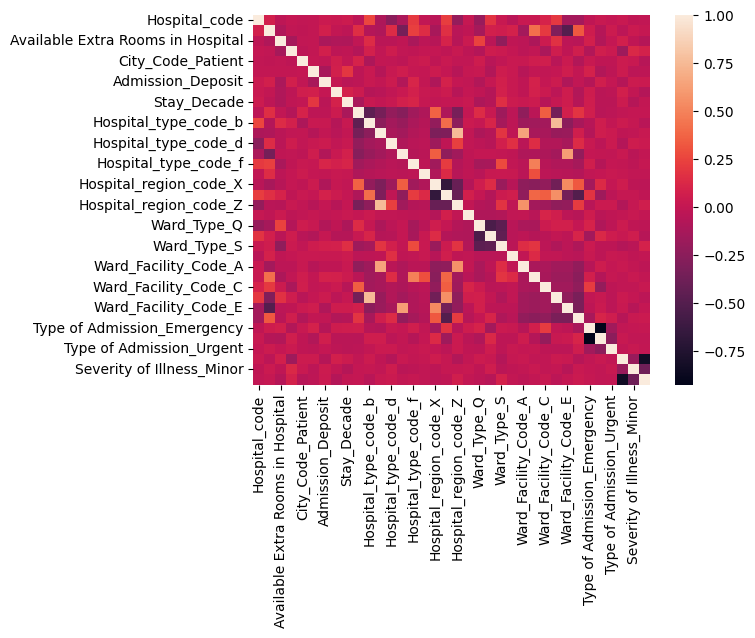

In [29]:
# Correlation matrix
corr = data.corr()
sns.heatmap(corr)

In order to filter the information we will take into account the correlations bigger than 0.3 and plot them individually

In [30]:
# Biggest correlations (>0.3) and plotting them individually and removing the diagonal
corr = data.corr()

corr = corr.mask(np.tril(np.ones(corr.shape), k=0).astype(bool))
corr = corr[abs(corr) > 0.3]
corr = corr.stack().reset_index()
corr.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr = corr.dropna()
corr = corr.sort_values(by='Correlation', ascending=False, key=abs)
corr






,Variable 1,Variable 2,Correlation
36,Type of Admission_Emergency,Type of Admission_Trauma,-0.923299
37,Severity of Illness_Extreme,Severity of Illness_Moderate,-0.836354
11,Hospital_type_code_b,Ward_Facility_Code_D,0.755566
14,Hospital_type_code_c,Hospital_region_code_Z,0.754414
19,Hospital_region_code_X,Hospital_region_code_Y,-0.665556
15,Hospital_type_code_c,Ward_Facility_Code_A,0.648444
17,Hospital_type_code_e,Ward_Facility_Code_E,0.622332
30,Hospital_region_code_Z,Ward_Facility_Code_A,0.565623
27,Hospital_region_code_Y,Ward_Facility_Code_D,0.549728
31,Ward_Type_Q,Ward_Type_R,-0.542190


We can see that the variables that have the highest correlation with the target variable are the following:
Type of Admission_Trauma and Type of Admission_Emergency, the correlation is -0.92 that means that when one variable increases the other decreases as it is close to 1 it is almost a perfect negative correlation. This makes sense as the variables come from the same colum when we performed the one hot encoding.

Same goes with severity of illness and many others (Severity of Illness_Extreme,Severity of Illness_Moderate,-0.836354, Hospital_region_code_X,Hospital_region_code_Y,-0.665556, ...)

There are some columns that can provide us with some valuable information such as:

- **Hospital_type_code_b and Ward_Facility_Code_D: 0.755566**
   - A high positive correlation indicates that hospitals of type "b" are more likely to have wards with facility code "D." This could mean that type "b" hospitals are specialized or equipped with facilities labeled "D" due to specific services or resources allocated to these hospital types. 
- **Hospital_type_code_c and Hospital_region_code_Z: 0.754414**
   - Hospitals of type "c" are often located in region "Z." This might imply that hospital type "c" is tailored to regional needs or regulatory requirements specific to region "Z" or that there is a regional preference for this hospital type.
 - **Hospital_type_code_c and Ward_Facility_Code_A: 0.648444**
   - Hospitals of type "c" frequently have facilities with code "A." This may indicate a specific type of infrastructure or service requirement for type "c" hospitals that aligns with facilities labeled "A."




### 1.4 Data visualization

Now, we will make some visualizations to understand the data better.

array([[<Axes: title={'center': 'Hospital_code'}>,
        <Axes: title={'center': 'City_Code_Hospital'}>,
        <Axes: title={'center': 'Available Extra Rooms in Hospital'}>],
       [<Axes: title={'center': 'Bed Grade'}>,
        <Axes: title={'center': 'City_Code_Patient'}>,
        <Axes: title={'center': 'Visitors with Patient'}>],
       [<Axes: title={'center': 'Admission_Deposit'}>,
        <Axes: title={'center': 'Age_Decade'}>,
        <Axes: title={'center': 'Stay_Decade'}>]], dtype=object)

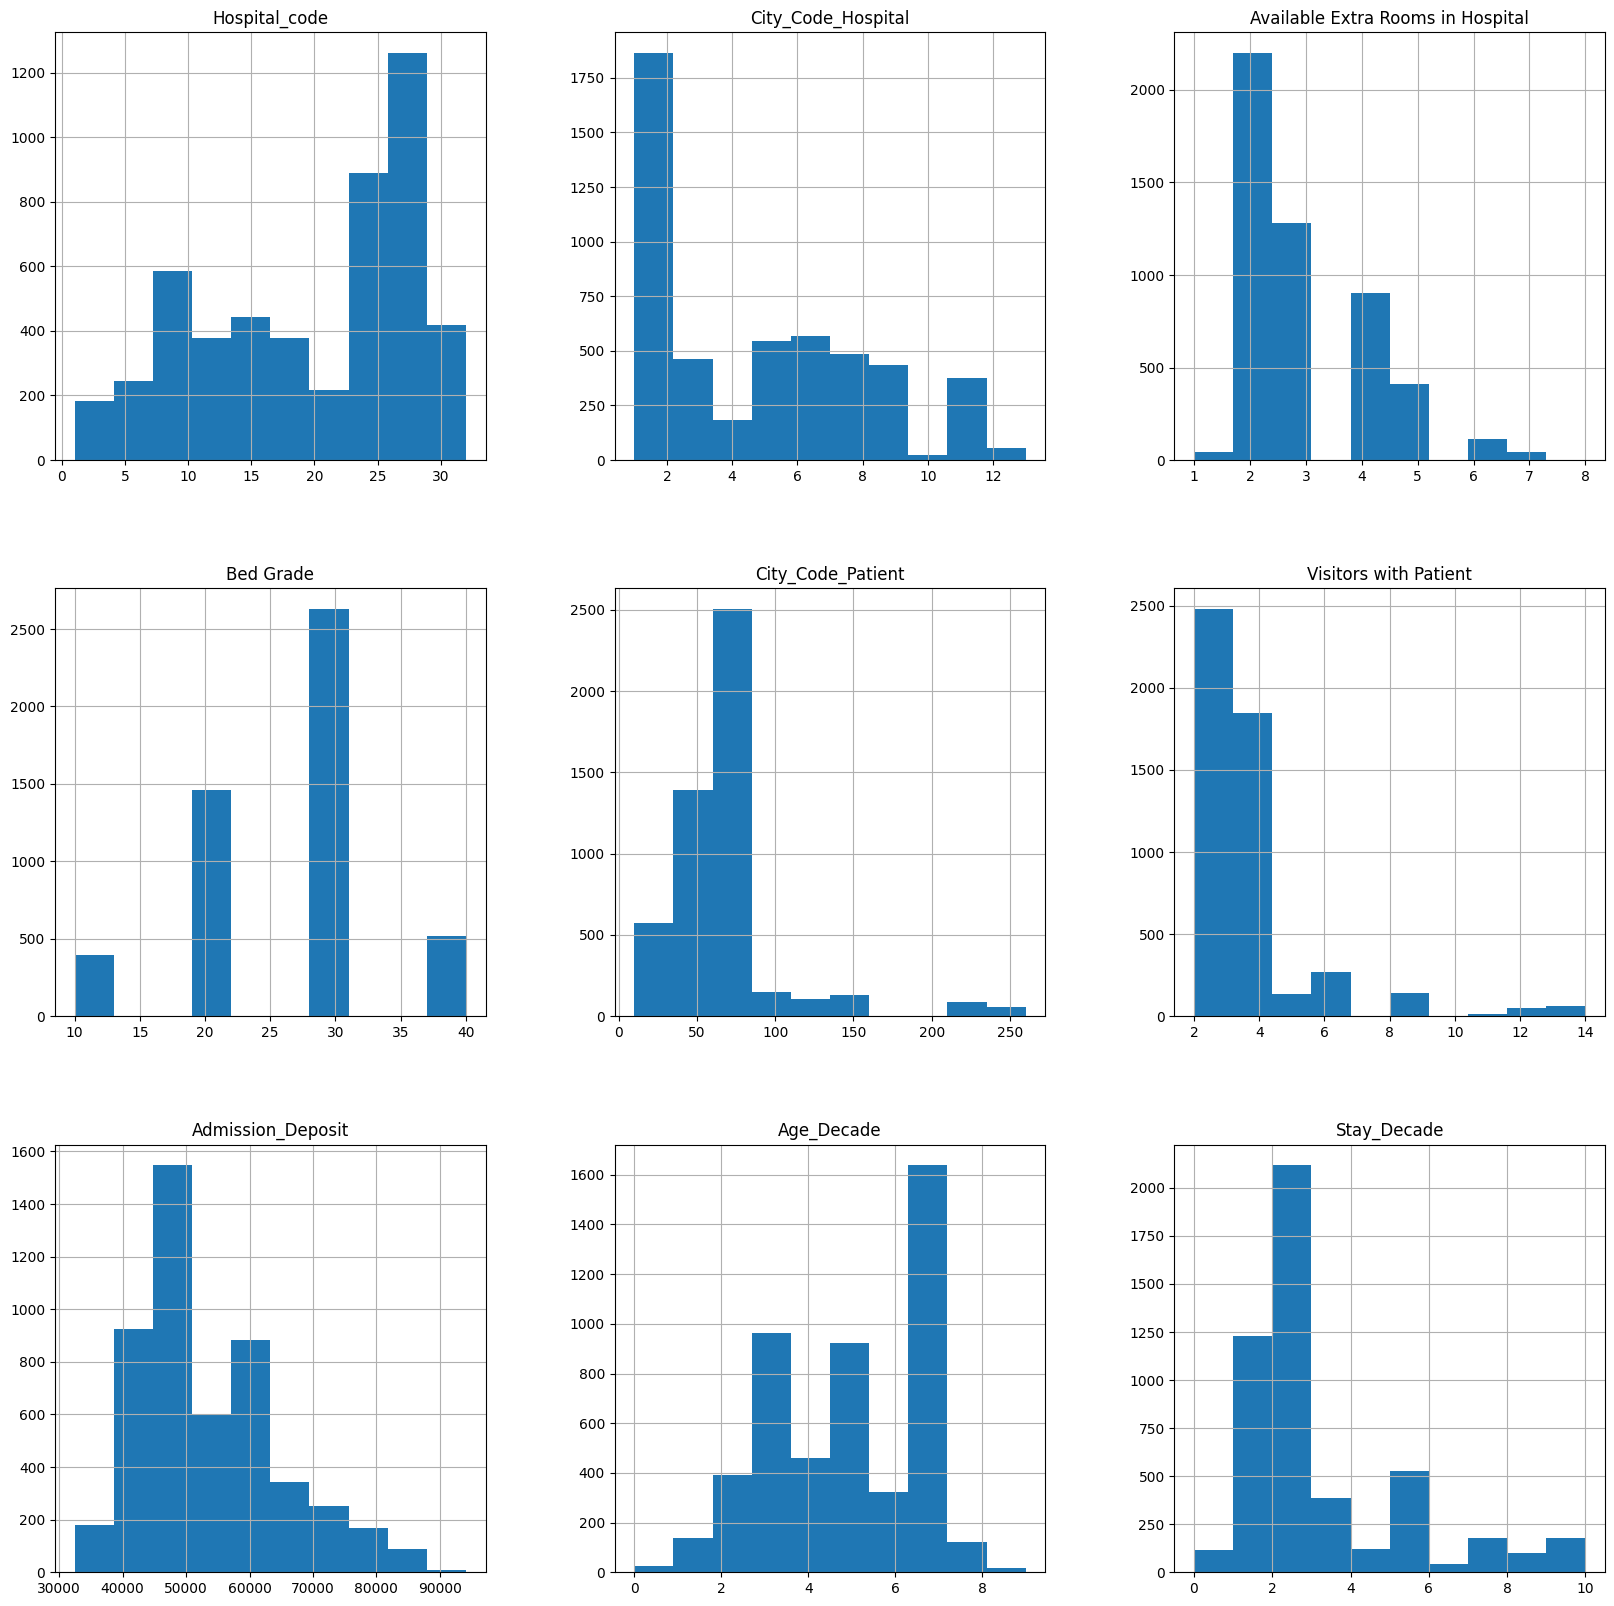

In [31]:
# Column distribution, make all the columns appear.
data.hist(figsize=(20,20))





We can see that the column of age appears to be normal with many outlier in the decade 7 and 8 this is logical because many of the patients will be elderly people. The column of visitors with patient is skewed to the right, this is logical as the majority of the patients will have few visitors. 

Moreover, the column of admission deposit and stay decade seem to follow a similar distribution, which is logical as the more days a patient stays in the hospital the more money he will have to pay.

### 1.5 Analysis of the categorical variables

Now we will plot the categorical variables to see which class has more representation in the dataset.

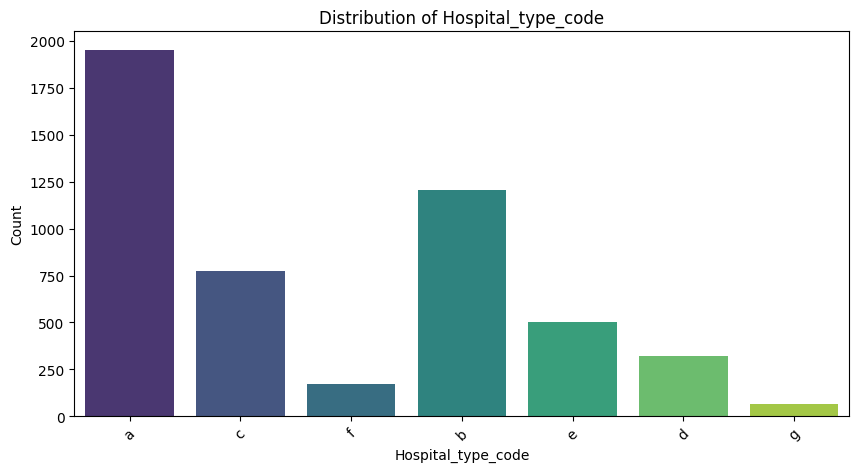

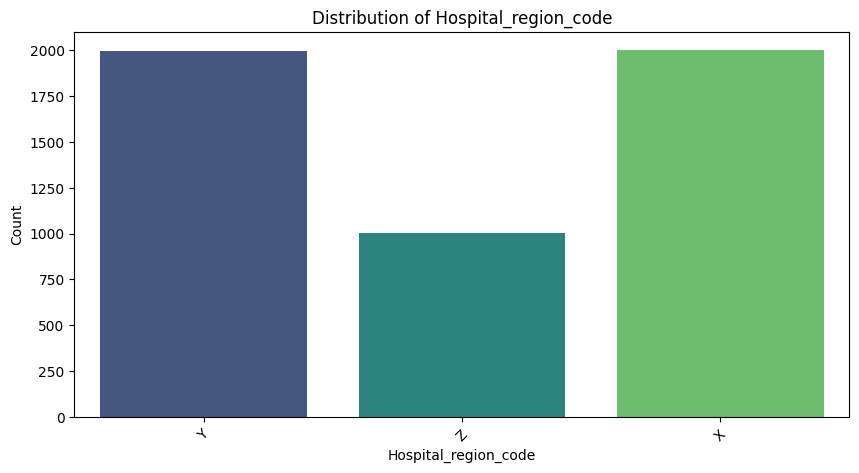

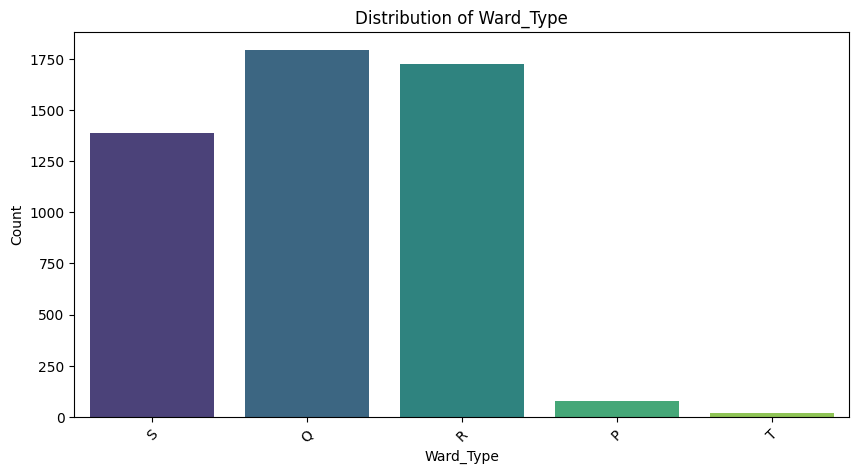

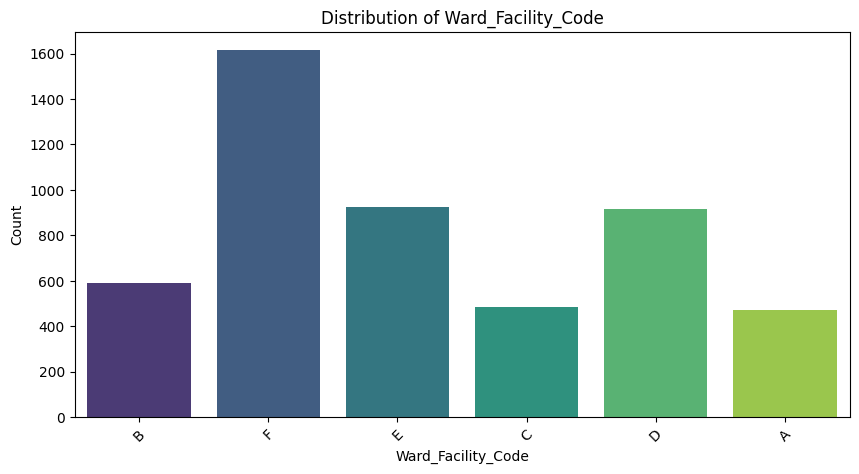

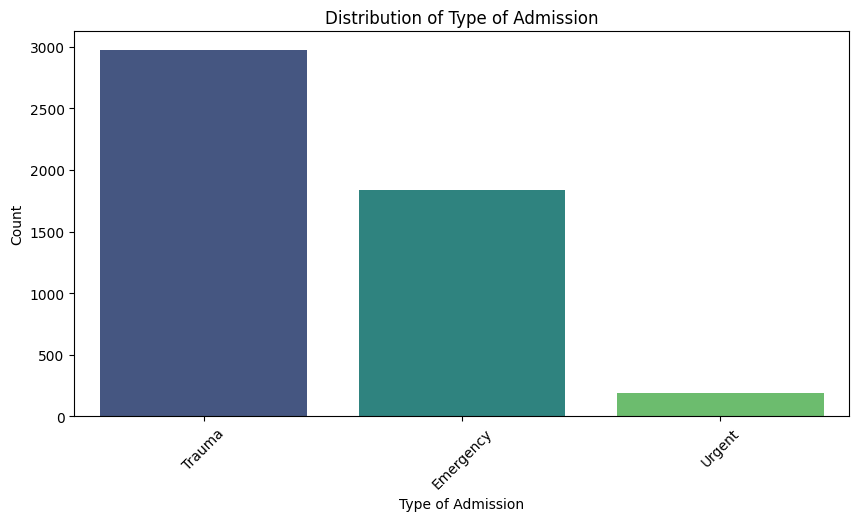

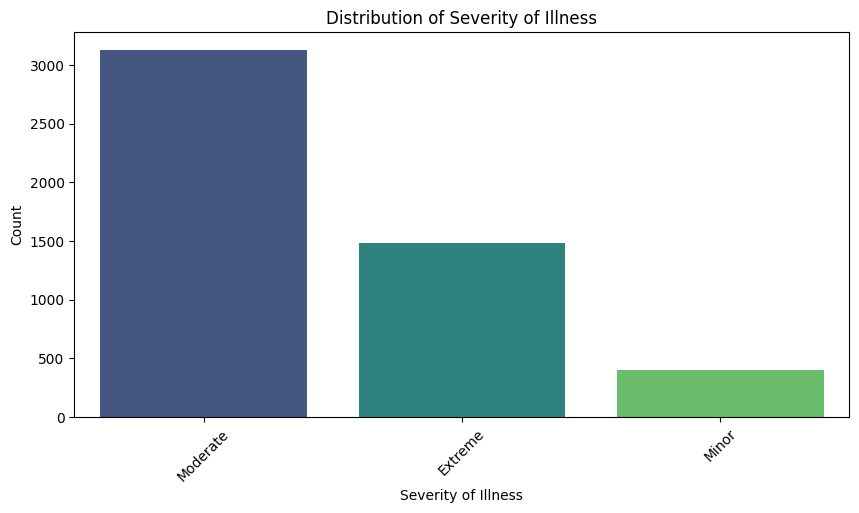

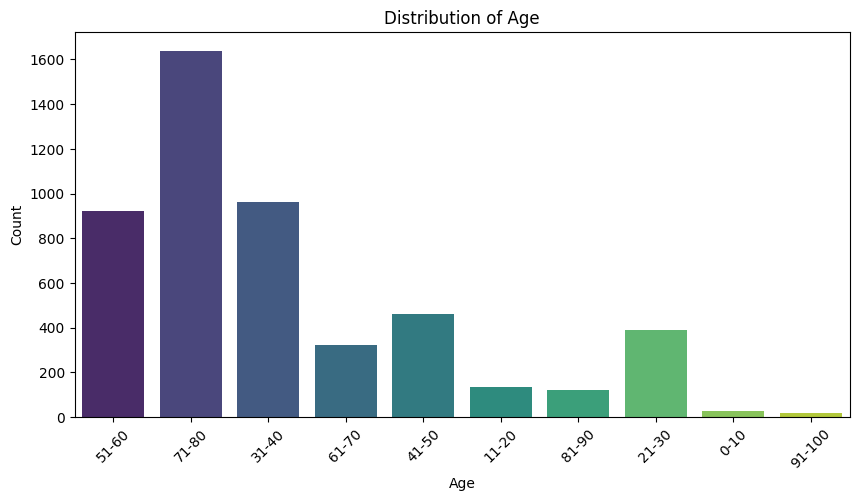

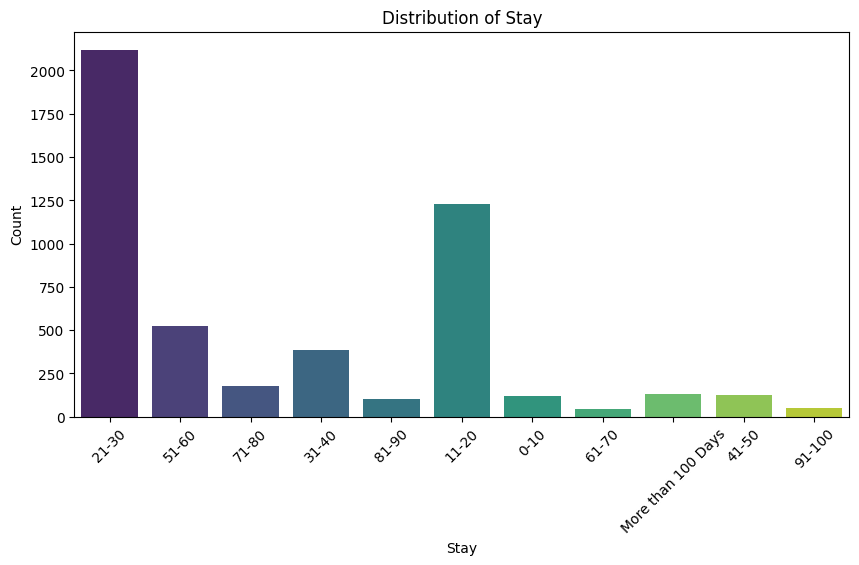

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reread the dataset, as we have transformed the columns
data2 = pd.read_csv('Hospitalization.csv', sep=';')

# Seleccionar las columnas categóricas
categorical_columns = data2.select_dtypes(include=['object', 'category']).columns

# Graficar cada columna categórica
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data2, x=column, hue=column, palette="viridis", legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()  



Se puede apreciar bastante desbalance, sobre todo en la columna "Stay" la cual tiene dos valores más representados que el resto.

### 1.6 Outliers 

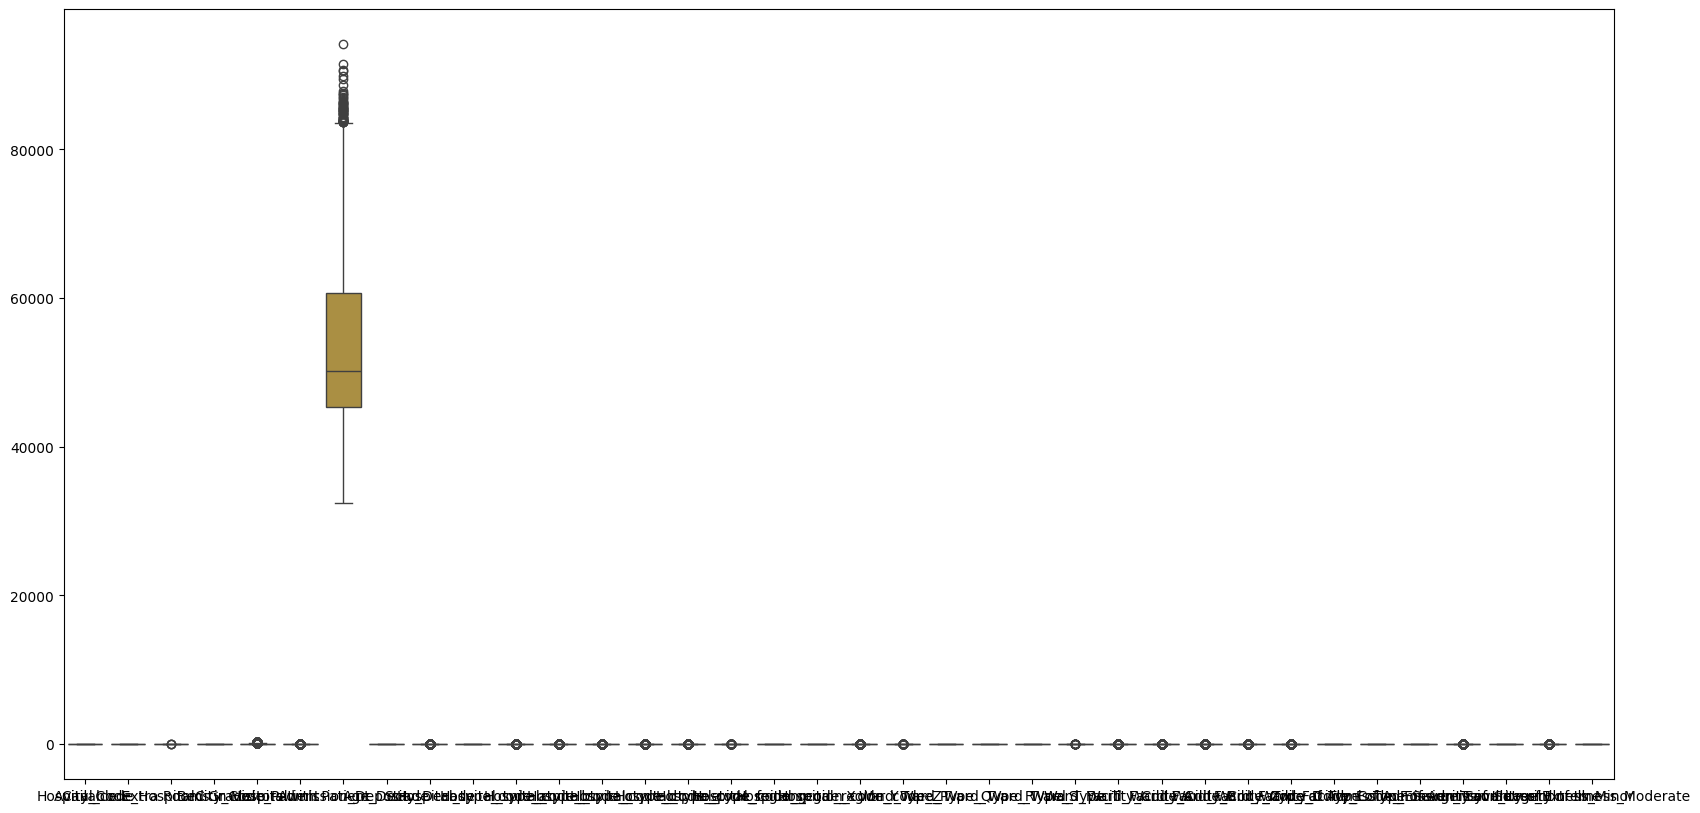

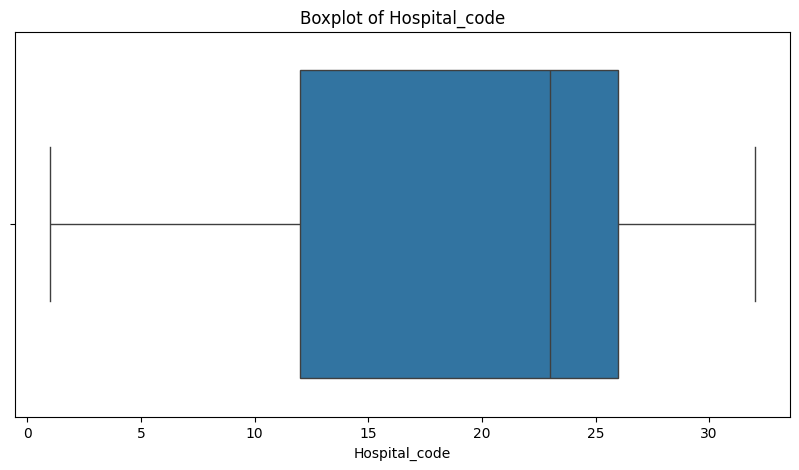

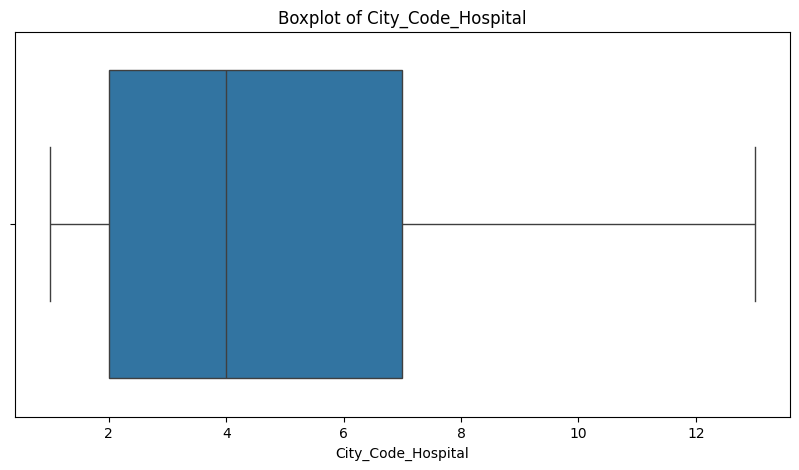

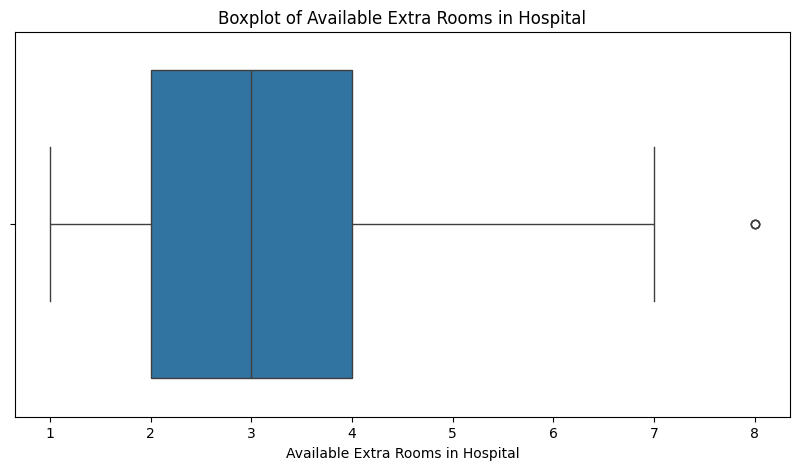

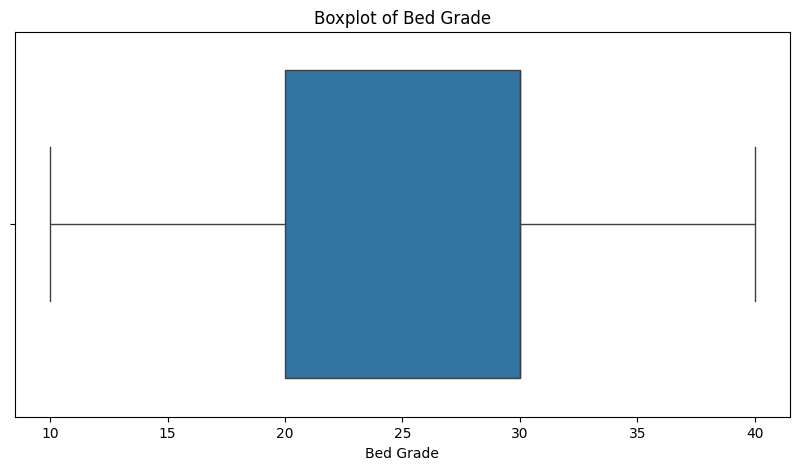

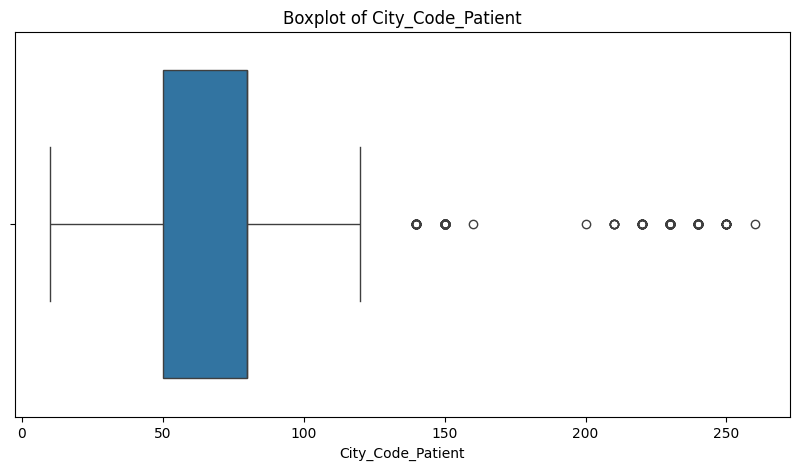

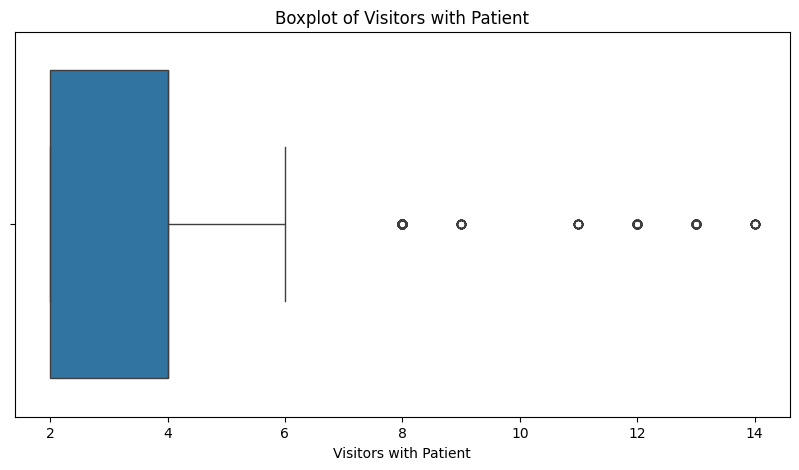

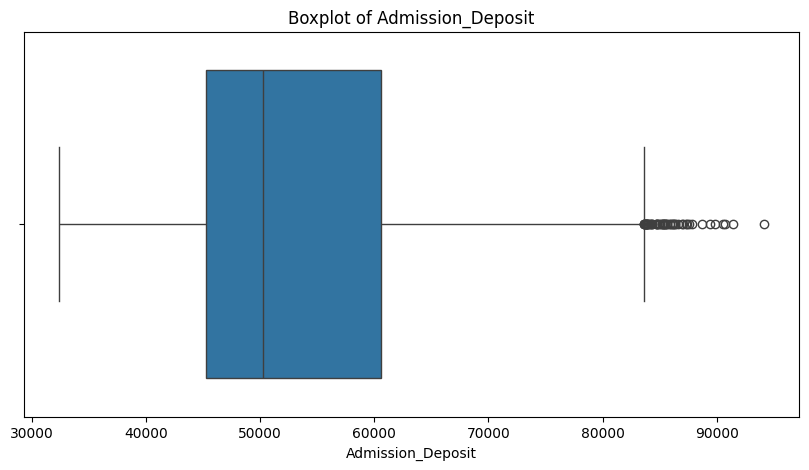

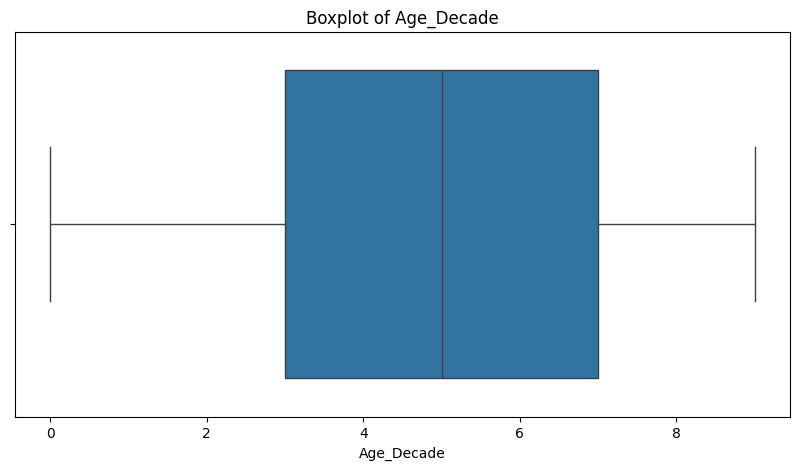

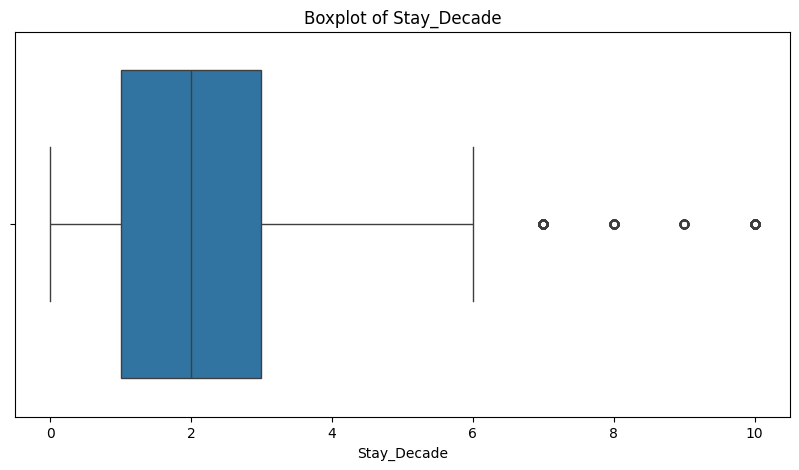

In [33]:
# Outliers with boxplot
plt.figure(figsize=(20,10))
sns.boxplot(data=data)

numeric_columns = data.select_dtypes(include=['number']).columns
non_boolean_columns = [col for col in numeric_columns if data[col].nunique() > 2]

for column in non_boolean_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


The majority of the columns have not too many outliers. The column with the most outliers is the target column, this could affect the regression model, so we  can consider removing outliers.

## 2. Preprocessing and regression model
### 2.1 Preprocessing; standarization, splitting and outlier removal

In [34]:
#Preprocessing - Standarization
from sklearn.preprocessing import StandardScaler
#standarization of numeric values
scaler = StandardScaler()
target_column = 'Admission_Deposit'


numeric_columns = data.select_dtypes(include=['number']).columnsnumeric_columns = data.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop(target_column)
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
#Data splitting

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Calculate Q1 and Q3 for the target variable in the training set
Q1 = train_data['Admission_Deposit'].quantile(0.25)
Q3 = train_data['Admission_Deposit'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the training set only
train_data = train_data[(train_data['Admission_Deposit'] >= lower_bound) & (train_data['Admission_Deposit'] <= upper_bound)]

# Outlier removed

C:\Users\alvar\AppData\Local\Temp\ipykernel_20452\1350964336.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  numeric_columns = data.select_dtypes(include=['number']).columnsnumeric_columns = data.select_dtypes(include=['number']).columns


We have standarized the dataset, and in the train set we have removed the outliers. Now we will build many regression models, first we will build a simple linear regression model and then we will build a polynomial regression model to see if we can improve the performance of the model to see how the model performs.

### 2.2 Linear regression model

R-squared (R^2): 0.04912741599718873
Adjusted R-squared (R^2_adj): 0.014604033797916527
Mean squared error: 109726248.5825


<Axes: xlabel='Admission_Deposit'>

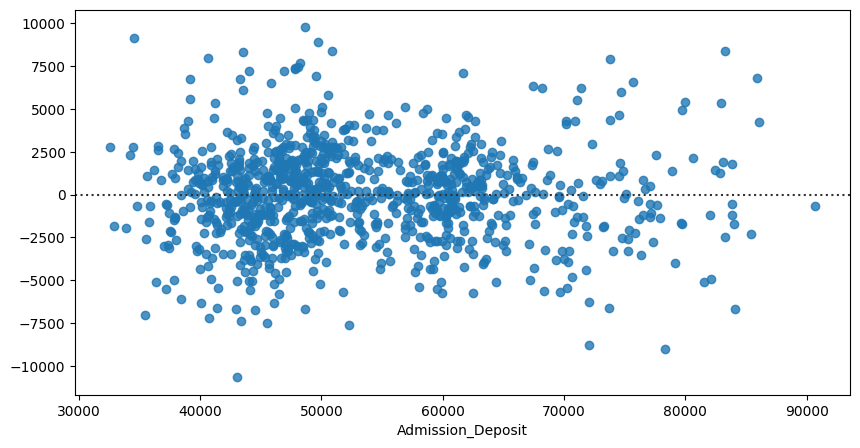

In [35]:
from sklearn.metrics import r2_score

#Simple linear regression model
X_train = train_data.drop(columns='Admission_Deposit')
y_train = train_data['Admission_Deposit']
X_test = test_data.drop(columns='Admission_Deposit')
y_test = test_data['Admission_Deposit']

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
#Get mean squeared error, S and S adj. Plot the residuals.
residuals = y_test - y_pred
mse = mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)

r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # Número de observaciones
p = X_test.shape[1]
# Calculate Adjusted R-squared
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the results
print(f'R-squared (R^2): {r2}')
print(f'Adjusted R-squared (R^2_adj): {r2_adj}')

print(f'Mean squared error: {mse}')


# Plot residuals
plt.figure(figsize=(10, 5))
sns.residplot(x=y_test, y=y_pred)


We can see that we are obtaining very bad results, therefore, we will try more algorithms capable of capturing non-linear relationships. We will start with polynomial regression.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR(),
    'Polynomial': Pipeline([
        ('poly_features', PolynomialFeatures()),
        ('linear_regression', LinearRegression())
    ])
}

# Grids de hiperparámetros para cada modelo
param_grids = {
     'LinearRegression': {
        'fit_intercept': [True, False]
    },
    'RandomForest': {
        'n_estimators': [10,30,40,50,100],
        'max_depth': [None,5, 10, 20, 30],
        'min_samples_split': [2, 5, 10,20]
    },
    'SVR': {
        'kernel': ['linear', 'poly', 'rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto']
    },
    'Polynomial': {
        'poly_features__degree': [2, 3, 4],
        'linear_regression__fit_intercept': [True, False]
    }
}

# Almacenar los resultados en una lista
results = []

# Procesar cada modelo y realizar GridSearchCV
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Predicciones con los mejores parámetros
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Cálculo de indicadores
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]  # Número de observaciones
    p = X_test.shape[1]  # Número de predictores
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    # Guardar los resultados en un diccionario
    results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_,
        'R2': r2,
        'R2 Adjusted': r2_adj,
        'MSE': mse,
        'RMSE': rmse
    })





# Gráfica de residuos para el mejor modelo en términos de RMSE
best_result = min(results, key=lambda x: x['RMSE'])
best_model_name = best_result['Model']
best_model = models[best_model_name].set_params(**best_result['Best Params'])
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best

plt.figure(figsize=(10, 5))
sns.residplot(x=y_test, y=y_pred_best)
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')
plt.title(f'Residuals Plot - {best_model_name}')
plt.show()

# Convertir los resultados a un DataFrame para visualización
results_df = pd.DataFrame(results)
print(results_df)

KeyboardInterrupt: 

              Model  \
0  LinearRegression   
1      RandomForest   
2               SVR   
3        Polynomial   

                                                              Best Params  \
0                                                 {'fit_intercept': True}   
1          {'max_depth': 5, 'min_samples_split': 20, 'n_estimators': 100}   
2                        {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}   
3  {'linear_regression__fit_intercept': True, 'poly_features__degree': 4}   

             R2   R2 Adjusted           MSE          RMSE  
0  4.912742e-02  1.460403e-02  1.097262e+08  1.047503e+04  
1  4.539357e-02  1.073462e-02  1.101571e+08  1.049558e+04  
2 -3.958232e-02 -7.732649e-02  1.199629e+08  1.095276e+04  
3 -2.151158e+13 -2.229260e+13  2.482335e+21  4.982304e+10  
